# dataset

In [6]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import time

from scripts.get_top_stocks import *
from scripts.generate_dataset_features import *
from scripts.utils import *
from scripts.dataloader import *
from scripts.train_predict import *
from scripts.models import *

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


KeyboardInterrupt



In [4]:
df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
df.to_csv("temp.csv",index=False)

In [8]:
df = pd.read_csv("temp.csv")

In [9]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,193.294998,193.979996,192.919998,193.630005,193.630005,95971,0.001654,-0.036150,-0.048020,...,0.072764,0.072008,0.058900,11.985754,0.312444,1.202297,0.059998,-1.09,0.000465,CDNS
1,2023-02-24 14:30:00-05:00,193.690002,194.234207,193.389999,193.720001,193.720001,118230,0.000465,0.055529,0.103916,...,0.072651,0.071712,0.058909,11.939630,0.311261,1.214926,-0.155792,-1.09,0.000103,CDNS
2,2023-02-24 15:30:00-05:00,193.699997,193.860001,192.789993,193.740005,193.740005,238227,0.000103,0.214485,0.336638,...,0.072154,0.071005,0.058353,11.884365,0.310712,1.223029,0.070007,-1.09,0.004044,CDNS
3,2023-02-27 09:30:00-05:00,195.350006,195.985001,193.889999,194.524994,194.524994,256997,0.004044,0.085675,0.037902,...,0.075858,0.074532,0.062091,11.838750,0.310425,1.219439,1.095001,0.31,-0.005102,CDNS
4,2023-02-27 10:30:00-05:00,194.419998,194.419998,193.039993,193.535004,193.535004,122909,-0.005102,-0.235853,-0.352950,...,0.069797,0.068271,0.056315,11.784444,0.310682,1.216054,0.380005,0.31,0.002348,CDNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,2024-07-31 10:30:00-04:00,186.809998,187.804993,186.500000,187.220001,187.220001,3943025,0.002137,-0.255125,-0.452135,...,-0.000742,-0.009437,-0.012332,6.255897,0.249468,1.024460,0.304993,0.68,-0.004014,AMZN
90063,2024-07-31 11:30:00-04:00,187.220001,187.430099,186.175003,186.470001,186.470001,2522377,-0.004014,-0.268048,-0.219731,...,-0.004708,-0.013460,-0.016361,6.249262,0.249307,1.014775,0.255096,0.68,-0.000751,AMZN
90064,2024-07-31 12:30:00-04:00,186.485992,187.029999,186.100098,186.330093,186.330093,2231179,-0.000751,-0.153623,-0.061259,...,-0.005412,-0.014263,-0.017139,6.241117,0.249217,1.016753,-0.070099,0.68,0.000360,AMZN
90065,2024-07-31 13:30:00-04:00,186.330002,186.725006,185.479996,186.397202,186.397202,3163219,0.000360,0.058807,0.172779,...,-0.005015,-0.013968,-0.016788,6.233574,0.249203,1.015955,0.245010,0.68,0.000685,AMZN


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,EMACloseDiff2,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,9.006700e+04,90067.000000,90067.000000,90067.000000,90067.000000,...,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000,90067.000000
mean,419.915576,421.676141,418.128724,419.934835,419.934835,1.825082e+06,0.000222,-0.040440,-0.000941,0.000099,...,0.012971,0.031536,0.032357,0.029428,18.480190,0.371235,1.079918,2.547417,0.140114,0.000223
std,667.943427,670.069174,665.759341,667.974239,667.974239,4.688528e+06,0.009817,0.202563,0.293013,0.003472,...,1.100543,0.077875,0.091833,0.081180,26.677447,0.153762,0.184946,6.324183,0.773144,0.009817
min,22.488001,22.783991,22.297001,22.584351,22.584351,0.000000e+00,-0.307408,-1.000000,-1.000000,-0.107576,...,-1.000000,-0.351848,-0.356385,-0.317741,0.513079,0.132707,0.571536,-1.000000,-2.160000,-0.307408
25%,108.570000,109.250000,107.884998,108.570000,108.570000,1.553600e+05,-0.003146,-0.158224,-0.178769,-0.001132,...,-0.486712,-0.013319,-0.019929,-0.019863,4.948850,0.264254,0.977379,-0.199997,-0.330000,-0.003144
50%,190.878204,191.854996,189.910004,190.929993,190.929993,3.715260e+05,0.000169,-0.040537,-0.014369,0.000094,...,-0.246398,0.029249,0.027770,0.027030,9.384963,0.341079,1.060464,0.599991,0.160000,0.000169
75%,376.609985,378.304947,375.172501,376.647507,376.647507,1.268490e+06,0.003476,0.093189,0.164868,0.001296,...,0.172925,0.070408,0.075657,0.073367,18.463687,0.436695,1.151376,2.409992,0.680000,0.003477
max,4135.640137,4144.319824,4126.919922,4142.520020,4142.520020,1.678987e+08,0.264883,0.495325,1.000000,0.085327,...,37.381413,0.872957,1.121935,0.723371,231.590475,1.387569,3.738774,225.962524,2.180000,0.264883


# remove outliers
* remove rows for features that have points that are 4 std_dev away from mean

In [14]:
features = df.columns[8:-4]
# print(len(features))

rows_indices_to_remove = []
for feature in features:
    feature_arr = df[feature].to_numpy()
    # break

    std_dev = np.std(feature_arr)
    mean_ = np.mean(feature_arr)
    for i in range(len(feature_arr)):
        current = feature_arr[i]
        if current < mean_ - 4 * std_dev or current > mean_ + 4 * std_dev:
            rows_indices_to_remove.append(i)

rows_indices_to_remove = set(rows_indices_to_remove)
print(len(rows_indices_to_remove))

9287


In [16]:
df = df.reset_index(drop=True)
df = df.drop(rows_indices_to_remove)
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,193.294998,193.979996,192.919998,193.630005,193.630005,95971,0.001654,-0.036150,-0.048020,...,0.072764,0.072008,0.058900,11.985754,0.312444,1.202297,0.059998,-1.09,0.000465,CDNS
1,2023-02-24 14:30:00-05:00,193.690002,194.234207,193.389999,193.720001,193.720001,118230,0.000465,0.055529,0.103916,...,0.072651,0.071712,0.058909,11.939630,0.311261,1.214926,-0.155792,-1.09,0.000103,CDNS
2,2023-02-24 15:30:00-05:00,193.699997,193.860001,192.789993,193.740005,193.740005,238227,0.000103,0.214485,0.336638,...,0.072154,0.071005,0.058353,11.884365,0.310712,1.223029,0.070007,-1.09,0.004044,CDNS
3,2023-02-27 09:30:00-05:00,195.350006,195.985001,193.889999,194.524994,194.524994,256997,0.004044,0.085675,0.037902,...,0.075858,0.074532,0.062091,11.838750,0.310425,1.219439,1.095001,0.31,-0.005102,CDNS
4,2023-02-27 10:30:00-05:00,194.419998,194.419998,193.039993,193.535004,193.535004,122909,-0.005102,-0.235853,-0.352950,...,0.069797,0.068271,0.056315,11.784444,0.310682,1.216054,0.380005,0.31,0.002348,CDNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,2024-07-31 10:30:00-04:00,186.809998,187.804993,186.500000,187.220001,187.220001,3943025,0.002137,-0.255125,-0.452135,...,-0.000742,-0.009437,-0.012332,6.255897,0.249468,1.024460,0.304993,0.68,-0.004014,AMZN
90063,2024-07-31 11:30:00-04:00,187.220001,187.430099,186.175003,186.470001,186.470001,2522377,-0.004014,-0.268048,-0.219731,...,-0.004708,-0.013460,-0.016361,6.249262,0.249307,1.014775,0.255096,0.68,-0.000751,AMZN
90064,2024-07-31 12:30:00-04:00,186.485992,187.029999,186.100098,186.330093,186.330093,2231179,-0.000751,-0.153623,-0.061259,...,-0.005412,-0.014263,-0.017139,6.241117,0.249217,1.016753,-0.070099,0.68,0.000360,AMZN
90065,2024-07-31 13:30:00-04:00,186.330002,186.725006,185.479996,186.397202,186.397202,3163219,0.000360,0.058807,0.172779,...,-0.005015,-0.013968,-0.016788,6.233574,0.249203,1.015955,0.245010,0.68,0.000685,AMZN


In [18]:
# # this is the csv without the target column, if not saved, just uncomment and run the previous 2 cells

# df = pd.read_csv("temp.csv")

In [20]:
def set_target(val):
    if val > 0.002:
        return 2
    elif val < -0.002:
        return 0
    else:
        return 1

df['Target'] = df["Log_Return_shift"].apply(lambda x: set_target(x))
df.Target.value_counts()

Target
2    27836
1    27178
0    25766
Name: count, dtype: int64

In [26]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Target == 2)]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Target == 0)]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


In [28]:
# sort df according to date
df['Datetime'] = pd.to_datetime(df['Datetime'])
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.6, 0.35, 0.05
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((48468, 77), (28273, 77), (4039, 77))

In [30]:
# df.columns, df.columns[8:-4]

In [32]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

65
(48468, 65) (48468,)
(28273, 65) (28273,)
(4039, 65) (4039,)


In [34]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [36]:
# standardise the values and PCA

from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
# pca = PCA(n_components = 0.95)
selector = SelectKBest(k=20)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)
X_train = selector.fit_transform(X_train,y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((48468, 20), (48468,), (28273, 20), (28273,), (4039, 20), (4039,))

In [38]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    16922
1    15969
0    15577
Name: count, dtype: int64
Target
1    9942
2    9623
0    8708
Name: count, dtype: int64
Target
0    1481
2    1291
1    1267
Name: count, dtype: int64


# pytorch model

In [41]:
# check dataset

print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape)
print(type(X_train),type(X_val),type(X_test))
print(type(y_train),type(y_val),type(y_test))

(48468, 20) (48468,) (28273, 20) (28273,) (4039, 20) (4039,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [43]:
# get_numpy_value_counts(y_train),get_numpy_value_counts(y_val),get_numpy_value_counts(y_test)

In [45]:
# define dataset
train_dataset = StockDataset(X=X_train,y=y_train)
val_dataset = StockDataset(X=X_val,y=y_val)
test_dataset = StockDataset(X=X_test,y=y_test)

print(train_dataset.X.shape,val_dataset.X.shape,test_dataset.X.shape)
print(train_dataset.y.shape,val_dataset.y.shape,test_dataset.y.shape)

# define dataloaders
batch_size = 2048

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, drop_last=True) # set all shuffle=False since its sequential data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# # print to check shape of batches
# for _, batch in enumerate(train_loader):
#     x_batch, y_batch = batch
#     print(x_batch.shape, y_batch.shape)
#     print(x_batch[0], y_batch[0])
#     break

torch.Size([48468, 20]) torch.Size([28273, 20]) torch.Size([4039, 20])
torch.Size([48468]) torch.Size([28273]) torch.Size([4039])


epoch 0
model epoch 0 saved as fcn.pt
Epoch 1/100, train loss: 1.1722, val loss: 1.0841, time_taken: 0.7
train acc: 35.74, val_acc: 39.67
epoch 1
model epoch 1 saved as fcn.pt
Epoch 2/100, train loss: 1.1194, val loss: 1.0799, time_taken: 0.8
train acc: 36.39, val_acc: 39.45
epoch 2
Epoch 3/100, train loss: 1.1003, val loss: 1.0800, time_taken: 0.8
train acc: 37.67, val_acc: 39.77
epoch 3
Epoch 4/100, train loss: 1.0930, val loss: 1.0808, time_taken: 0.8
train acc: 38.12, val_acc: 39.67
epoch 4
Epoch 5/100, train loss: 1.0884, val loss: 1.0803, time_taken: 0.8
train acc: 38.74, val_acc: 39.98
epoch 5
Epoch 6/100, train loss: 1.0860, val loss: 1.0803, time_taken: 0.8
train acc: 38.48, val_acc: 40.04
epoch 6
model epoch 6 saved as fcn.pt
Epoch 7/100, train loss: 1.0848, val loss: 1.0782, time_taken: 0.8
train acc: 38.67, val_acc: 40.62
epoch 7
model epoch 7 saved as fcn.pt
Epoch 8/100, train loss: 1.0850, val loss: 1.0779, time_taken: 0.9
train acc: 39.1, val_acc: 40.74
epoch 8
Epoch 9/1

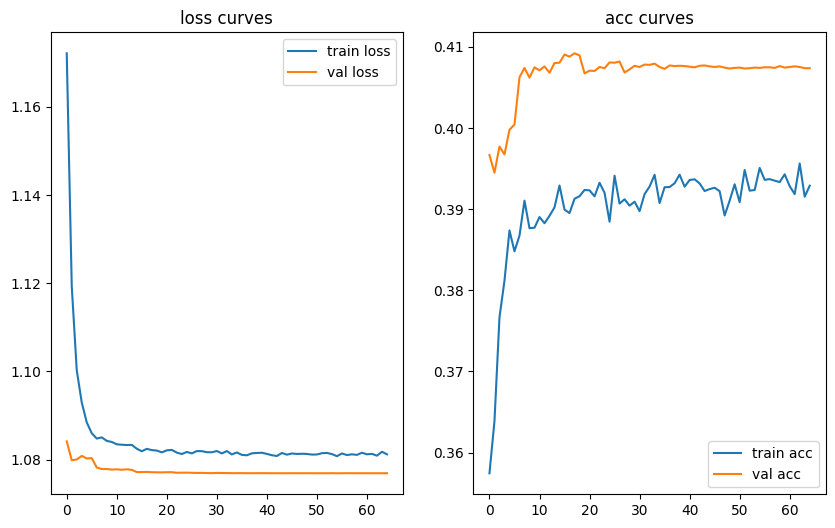

In [47]:
# define model inputs

device = torch.device('cpu')
lr= 1e-3
epochs = 100
scheduler_factor=0.5
scheduler_patience=3
early_stopping_limit = 10
class_weights = [0.889795540181605, 0.6693186731731422, 0.5517017728086973]
criterion = 'cross'
num_features = 20
num_classes = 3

model, train_losses, val_losses, train_accs, val_accs = train(
    device=device,
    lr=lr,
    epochs=epochs,
    scheduler_factor=scheduler_factor,
    scheduler_patience=scheduler_patience,
    early_stopping_limit=early_stopping_limit,
    class_weights=class_weights,
    criterion=criterion,
    train_loader=train_loader,
    val_loader=val_loader,
    num_features=num_features,
    num_classes=num_classes
)
plot_loss_acc(train_losses, val_losses, train_accs, val_accs)

overall test accuracy: 38.5
acc-sell: 10.263
acc-hold: 55.88
acc-buy: 53.834


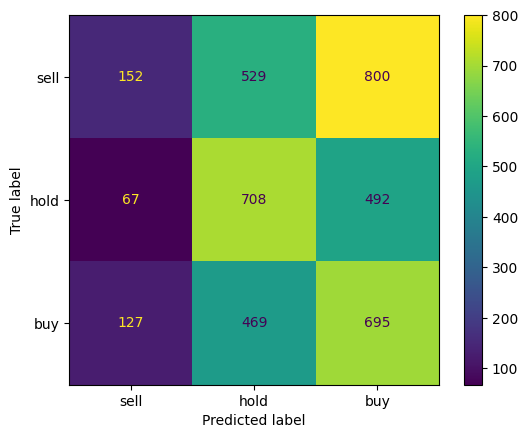

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

best_model_path = 'fcn.pt'
model = FCN(
    num_features=num_features,
    num_classes=num_classes
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()


X_test2 = torch.tensor(X_test, dtype=torch.float32)
y_test2 = torch.tensor(y_test, dtype=torch.float32)

preds = model(X_test2)
softmax_preds = nn.Softmax(dim=1)(preds)
_, class_preds = torch.max(preds, dim=1)

test_acc = accuracy_score(class_preds,y_test2)
print(f"overall test accuracy: {round(test_acc*100,2)}")

labels = ["sell","hold","buy"]
label_mapping = {i:labels[i] for i in range(len(labels))}

cm = confusion_matrix(y_test2, class_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
for i in range(len(cm)):
    print(f"acc-{label_mapping[i]}: {round(cm[i,i]/sum(cm[i])*100,3)}")

disp.plot()
plt.show()

In [49]:
# check softmax values

nn.Softmax(dim=1) (preds)

tensor([[0.2986, 0.4133, 0.2882],
        [0.3300, 0.3330, 0.3369],
        [0.3428, 0.3222, 0.3350],
        ...,
        [0.3578, 0.2847, 0.3574],
        [0.2994, 0.3708, 0.3298],
        [0.2540, 0.4560, 0.2901]], grad_fn=<SoftmaxBackward0>)

In [207]:
softmax_preds.shape

torch.Size([4039, 3])

In [406]:
def threshold_pred(softmax_pred,thre_buy=0.7,thre_sell=0.7):
    if softmax_pred[2] >= thre_buy:
        return 2
    elif softmax_pred[0] >= thre_sell:
        return 0
    else:
        # just hold
        return 1

def get_threshold_preds(softmax_preds,thre_buy=0.7,thre_sell=0.7):
    res = []
    for softmax_pred in softmax_preds:
        pred = threshold_pred(softmax_pred,thre_buy,thre_sell)
        res.append(pred)
    return res

accuracy: 37.91


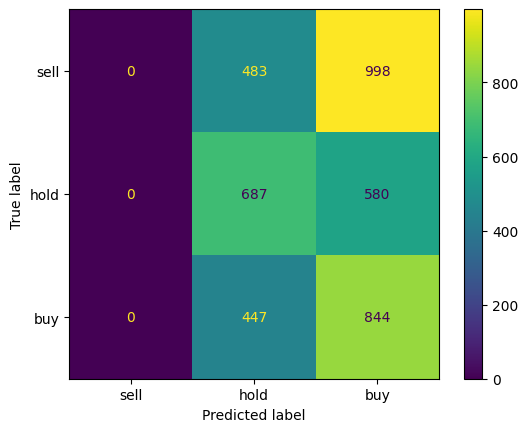

In [422]:
thre_preds = get_threshold_preds(softmax_preds,thre_buy=0.33,thre_sell=0.5)

acc = accuracy_score(thre_preds,y_test)
print(f"accuracy: {round(acc*100,2)}")

cm = confusion_matrix(y_test, thre_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

# predict indiv stocks

In [32]:
## predict on indiv stocks

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    # stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    stock_X
    stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()
    stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

    stock_preds = model(stock_X_test)
    softmax_preds = nn.Softmax(dim=1)(stock_preds)
    _, class_preds = torch.max(softmax_preds, dim=1)
    
    acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

    print(f"{stock_name}: {round(acc*100,2)}")

# # choose top 10 from here

RR.L: 28.92
MKS.L: 37.35
III.L: 31.33
MELI: 38.4
INTU: 26.4
SMCI: 33.6
WDAY: 28.8
META: 31.2
BKNG: 28.0
ABNB: 26.4
TSLA: 38.4
ADBE: 31.2
TEAM: 31.2
AMD: 34.4
AMZN: 30.4
DASH: 36.8
DDOG: 36.8
SNPS: 32.0
TTD: 32.8
NVDA: 37.6
AMAT: 36.0
MDB: 32.0
LRCX: 33.6
CRWD: 33.6
AVGO: 39.2
PANW: 32.0
INTC: 29.6
MSFT: 23.2
CDNS: 27.2
MU: 29.6
MRVL: 36.8
MRNA: 33.6
ZS: 32.8
PDD: 28.8
CPRT: 26.4


In [33]:
stock_name = "TTD"

stock_df = test_df[test_df['stock_name']==stock_name]
stock_X_test = stock_df[features].to_numpy()
# if use selectKbest
# stock_X_test = selector.transform(stock_X_test)
# if use PCA
stock_X_test = pca.transform(stock_X_test)

stock_y_test = stock_df[target].to_numpy()
stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

stock_preds = model(stock_X_test)
softmax_preds = nn.Softmax(dim=1)(stock_preds)
_, class_preds = torch.max(softmax_preds, dim=1)

acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

print(f"{stock_name}: {round(acc*100,2)}")

TTD: 32.8


In [34]:
softmax_preds[:10]

tensor([[0.3927, 0.2396, 0.3677],
        [0.2476, 0.3721, 0.3803],
        [0.3457, 0.2311, 0.4232],
        [0.3182, 0.2736, 0.4082],
        [0.3013, 0.2843, 0.4145],
        [0.3832, 0.3385, 0.2782],
        [0.2885, 0.3855, 0.3260],
        [0.3129, 0.3495, 0.3376],
        [0.2659, 0.3286, 0.4056],
        [0.2945, 0.2666, 0.4389]], grad_fn=<SliceBackward0>)

In [35]:
def threshold_pred(softmax_pred,thre_buy=0.7,thre_sell=0.7):
    if softmax_pred[2] >= thre_buy:
        return 2
    elif softmax_pred[0] >= thre_sell:
        return 0
    else:
        # just hold
        return 1

def get_threshold_preds(softmax_preds,thre_buy=0.7,thre_sell=0.7):
    res = []
    for softmax_pred in softmax_preds:
        pred = threshold_pred(softmax_pred,thre_buy,thre_sell)
        res.append(pred)
    return res

In [36]:
len(stock_y_test)

125

accuracy: 35.2


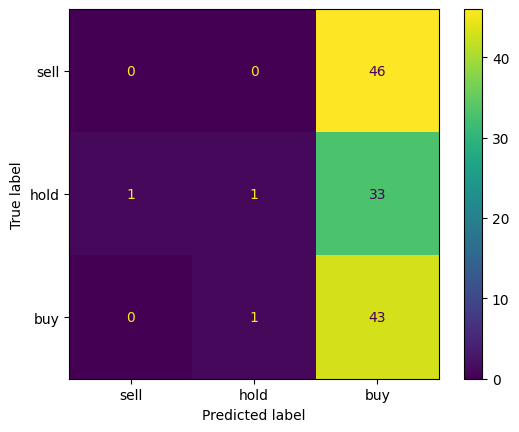

In [37]:
thre_preds = get_threshold_preds(softmax_preds,thre_buy=0.33333,thre_sell=0.303333)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(thre_preds,stock_y_test)
print(f"accuracy: {round(acc*100,2)}")

cm = confusion_matrix(stock_y_test, thre_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [38]:
## predict on top 10 stocks

stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "RR.L",
    "PDD",
]

for stock_name in stock_list:
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    # stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()
    stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)

    stock_preds = model(stock_X_test)
    softmax_preds = nn.Softmax(dim=1)(stock_preds)
    _, class_preds = torch.max(softmax_preds, dim=1)
    
    acc = accuracy_score(stock_y_test, class_preds.detach().numpy())

    print(f"{stock_name}: {round(acc*100,2)}")

# # choose top 10 from here

DDOG: 36.8
SNPS: 32.0
BKNG: 28.0
SMCI: 33.6
MDB: 32.0
NVDA: 37.6
MELI: 38.4
WDAY: 28.8
RR.L: 28.92
PDD: 28.8


# pnl calc

In [137]:
df=pd.read_csv("temp.csv")

In [139]:
import pandas as pd
from datetime import datetime

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

# Print the filtered DataFrame
test_df

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_2208/254771661.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Datetime'] = pd.to_datetime(df['Datetime'])


,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
2354,2024-07-01 09:30:00-04:00,307.750000,309.024994,304.119995,308.799988,308.799988,359433,0.003471,0.062605,-0.025036,...,0.021968,0.036160,0.031981,12.085090,0.218536,1.075396,3.904999,0.68,0.006311,CDNS
2355,2024-07-01 10:30:00-04:00,309.075012,311.000000,308.609985,310.755005,310.755005,161100,0.006311,-0.268233,-0.381019,...,0.028211,0.042369,0.038289,12.083663,0.218204,1.090177,1.390015,0.68,-0.001063,CDNS
2356,2024-07-01 11:30:00-04:00,310.730011,311.190002,309.420013,310.424988,310.424988,77914,-0.001063,-0.378313,-0.348038,...,0.026902,0.040912,0.036980,12.078754,0.218204,1.090186,0.769989,0.68,0.002558,CDNS
2357,2024-07-01 12:30:00-04:00,310.450012,311.220001,309.980011,311.220001,311.220001,49048,0.002558,-0.341410,-0.227359,...,0.029295,0.043208,0.039392,12.073642,0.218194,1.095189,0.239990,0.68,-0.001640,CDNS
2358,2024-07-01 13:30:00-04:00,310.880005,311.619904,310.579987,310.709991,310.709991,70550,-0.001640,-0.018204,0.179786,...,0.027388,0.041140,0.037441,12.066580,0.218249,1.092511,0.039917,0.68,0.002636,CDNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,2024-07-31 10:30:00-04:00,186.809998,187.804993,186.500000,187.220001,187.220001,3943025,0.002137,-0.255125,-0.452135,...,-0.000742,-0.009437,-0.012332,6.255897,0.249468,1.024460,0.304993,0.68,-0.004014,AMZN
90063,2024-07-31 11:30:00-04:00,187.220001,187.430099,186.175003,186.470001,186.470001,2522377,-0.004014,-0.268048,-0.219731,...,-0.004708,-0.013460,-0.016361,6.249262,0.249307,1.014775,0.255096,0.68,-0.000751,AMZN
90064,2024-07-31 12:30:00-04:00,186.485992,187.029999,186.100098,186.330093,186.330093,2231179,-0.000751,-0.153623,-0.061259,...,-0.005412,-0.014263,-0.017139,6.241117,0.249217,1.016753,-0.070099,0.68,0.000360,AMZN
90065,2024-07-31 13:30:00-04:00,186.330002,186.725006,185.479996,186.397202,186.397202,3163219,0.000360,0.058807,0.172779,...,-0.005015,-0.013968,-0.016788,6.233574,0.249203,1.015955,0.245010,0.68,0.000685,AMZN


In [141]:
stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "RR.L",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]
test_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
12366,2024-07-01 09:30:00-04:00,832.000000,832.000000,773.880005,792.909973,792.909973,2966275,-0.029746,0.183145,0.190226,...,-0.063748,-0.059065,-0.073863,53.522078,0.682372,0.956281,57.119995,0.68,0.031788,SMCI
12367,2024-07-01 10:30:00-04:00,793.580017,822.049988,790.000000,818.520081,818.520081,1287760,0.031788,-0.239905,-0.394570,...,-0.033256,-0.028687,-0.043810,53.516415,0.685859,1.003691,31.049988,0.68,-0.003345,SMCI
12368,2024-07-01 11:30:00-04:00,818.000000,821.000000,808.500000,815.786926,815.786926,717842,-0.003345,-0.311949,-0.284163,...,-0.036211,-0.031928,-0.046925,53.517533,0.685906,0.999298,11.500000,0.68,0.003240,SMCI
12369,2024-07-01 12:30:00-04:00,815.786926,819.889893,803.940125,818.434021,818.434021,588282,0.003240,-0.204975,-0.099194,...,-0.032834,-0.028783,-0.043769,53.519045,0.685895,0.998943,14.949768,0.68,-0.005205,SMCI
12370,2024-07-01 13:30:00-04:00,818.515015,820.739990,810.000000,814.184998,814.184998,468075,-0.005205,-0.162209,-0.113794,...,-0.037572,-0.033748,-0.048786,53.544146,0.684996,0.979219,9.739990,0.68,-0.001893,SMCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87559,2024-07-31 10:30:00-04:00,1664.239990,1667.010010,1650.000000,1653.000000,1653.000000,23592,-0.005761,-0.233540,-0.322283,...,0.000934,0.007516,0.006185,51.357673,0.289214,1.023650,16.010010,0.68,0.002562,MELI
87560,2024-07-31 11:30:00-04:00,1652.969971,1657.699951,1648.000000,1657.239990,1657.239990,21878,0.002562,-0.119438,-0.037695,...,0.003474,0.010006,0.008665,51.348256,0.289243,1.024271,8.699951,0.68,0.003331,MELI
87561,2024-07-31 12:30:00-04:00,1661.239990,1664.689941,1656.750000,1662.770020,1662.770020,14960,0.003331,-0.180506,-0.187795,...,0.006769,0.013288,0.011935,51.358059,0.289097,1.022614,6.939941,0.68,-0.002680,MELI
87562,2024-07-31 13:30:00-04:00,1660.540039,1660.540039,1651.045044,1658.319946,1658.319946,34124,-0.002680,0.183448,0.390433,...,0.004043,0.010482,0.009148,51.351674,0.288994,1.023996,8.494995,0.68,0.006486,MELI


In [143]:
test_df.stock_name.value_counts()

stock_name
RR.L    206
SMCI    149
MDB     149
BKNG    149
PDD     149
NVDA    149
SNPS    149
WDAY    149
DDOG    149
MELI    149
Name: count, dtype: int64

In [145]:
# common_dates = test_df[test_df.stock_name=='SMCI'].Datetime.unique()
# extra_dates = test_df[
#     (test_df.stock_name=='RR.L') &
#     (~ test_df.Datetime.isin(common_dates))
# ]

# extra_dates

In [152]:
best_model_path = 'fcn-best.pt'
model = FCN(
    num_features=20,
    num_classes=3
)
model.load_state_dict(torch.load(best_model_path,map_location=device))
model.eval()

RuntimeError: Error(s) in loading state_dict for FCN:
	Missing key(s) in state_dict: "fcn.5.weight", "fcn.5.bias", "fcn.5.running_mean", "fcn.5.running_var", "fcn.8.weight", "fcn.8.bias". 
	Unexpected key(s) in state_dict: "fcn.3.weight", "fcn.3.bias", "fcn.4.running_mean", "fcn.4.running_var", "fcn.4.num_batches_tracked", "fcn.7.weight", "fcn.7.bias". 
	size mismatch for fcn.4.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([256, 1024]).

In [91]:
def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()
        # stock_X_test = pca.transform(stock_X_test)
        stock_X_test = selector.transform(stock_X_test)

        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model(stock_X_test)

        _, class_preds = torch.max(stock_preds, dim=1)
        class_preds = class_preds.detach().numpy()
        res[ticker] = pd.Series(class_preds)
        print(len(stock_X_test))

        
        
    res = res.replace({0:-1, 1:0, 2:1})
    # res['Date'] = test_df.Datetime.unique()
    # # res = res.set_index('Date')
    # res = res.astype('int16')
    # res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    # res = res.div(res['total'], axis=0)
    # res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model)

149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
149
206
149
149
149
206
149
206
149
149
149
149
149
149
149
149
149


In [89]:
res

,CDNS,CPRT,AMAT,MU,SMCI,MDB,BKNG,AVGO,INTC,TSLA,...,MKS.L,AMD,PANW,SNPS,ZS,WDAY,DDOG,LRCX,MELI,AMZN
0,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
4,1,-1,1,1,1,1,1,1,1,1,...,0,1,1,-1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
145,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
146,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
147,1,1,-1,-1,1,1,1,-1,1,1,...,0,1,1,-1,1,1,-1,-1,1,1


# inference.py

In [224]:
import torch.nn as nn
import torch.nn.functional as F

class FCN(nn.Module):
    def __init__(self,num_features,num_classes):        
        super(FCN, self).__init__()
        self.fcn = nn.Sequential(
            nn.Linear(num_features, 1024),
            nn.BatchNorm1d(1024),
            nn.Tanh(),
            nn.Dropout(0.5),
            
            nn.Linear(1024, 256),
            nn.BatchNorm1d(256),
            nn.Tanh(),
            nn.Dropout(0.5),          
            
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.fcn(x)
        return x


def load_model(model_path,num_features=26,num_classes):
    model = FCN(
        num_features=num_features,
        num_classes=num_classes
    )
    model.load_state_dict(torch.load(best_model_path,map_location=device))
    model.eval()

    return model

In [221]:
model_path = 'fcn.pt'

model = load_model(model_path=model_path)

TypeError: __init__() missing 2 required positional arguments: 'num_features' and 'num_classes'

In [ ]:
def evaluate(X_test,y_test):
    criterion = nn.CrossEntropyLoss()

    # load best pretraining model
    best_model_path = 'fcn.pt'
    model = FCN()
    model.load_state_dict(torch.load(best_model_path,map_location=device))
    model.eval()

    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
    
    preds = model(X_test.to(device))
    softmax_preds=nn.Softmax(dim=1)(preds)
    test_loss = criterion(softmax_preds,y_test.long())
    print("test loss: ",test_loss)
    test_acc = round(get_accuracy(softmax_preds,y_test)*100,2)
    print("test acc: ",test_acc)
    
    return preds